# HW02: Practice with logistic regression and decision tree

Kara Conrad, 9082326472

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

The model's accuracy is 0.93.
The probability of a flower with petal length 5 being a virginica is [0.7725422].
With petal length of 5, the prediction is one which is Virginica.


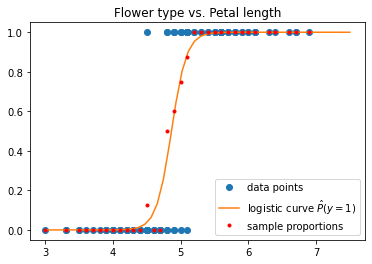

In [2]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/iris.csv")
df2 = df[df.Species!="setosa"].drop(["Sepal.Length", "Sepal.Width", "Petal.Width"], axis=1)
model = linear_model.LogisticRegression(C=1000)
X = np.array(df2[["Petal.Length"]])
Y = (df2['Species'] == 'virginica').to_numpy().astype(int)
model.fit(X, Y)

print(f'The model\'s accuracy is {model.score(X, Y)}.')

print(f'The probability of a flower with petal length 5 being a virginica is {model.predict_proba([[5]])[:, 1]}.')

model.predict([[5]])
print("With petal length of 5, the prediction is one which is Virginica.")


plt.plot(X, Y, 'o', label = "data points")
plt.title("Flower type vs. Petal length")
xplot = np.linspace(start=3, stop=7.5)
yplot = 1 / (1 + np.exp(-(model.coef_[0] * xplot + model.intercept_)))
plt.plot(xplot, yplot, label=r'logistic curve $\hat{P}(y = 1)$')

x_values, x_counts = np.unique(X, return_counts=True)
n_x_values = x_values.shape[0]
success_proportion_per_x_value = np.zeros(n_x_values)
for i in np.arange(n_x_values):
    success_proportion_per_x_value[i] = np.sum(Y[X[:, 0] == x_values[i]]) / x_counts[i]
plt.plot(x_values, success_proportion_per_x_value, '.', color='red',
         label='sample proportions')
plt.legend()

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

### $\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line. 
  \ln \frac{p}{1 - p} &= \ln \frac{1}{1 + e^{-(w x + b)}} - \ln \frac{1}{1 - \frac{1}{1 + e^{-(w x + b)}}} \\ &= \ln \frac{e^{w x + b}}{1 + e^{w x + b}} - \ln \frac{1 + e^{-(w x + b)}}{e^{-(w x + b)}} \\ &= \ln \frac{1 + e^{w x + b} - 1}{1 + e^{w x + b}} - \ln \frac{1}{1 + e^{w x + b}} \\ &= \ln \frac{1 + e^{w x + b}}{e^{w x + b}} - \ln \frac{1 + e^{w x + b}}{1} \\ &= w x + b \end{align*}$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

## 1:D, 2:C, 3:A, 4:B

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

# 2. Decision tree

Tree 1-- The accuracy score is: 0.896. And the tree's depth is: 15.
Tree 2-- The accuracy score is: 0.791.


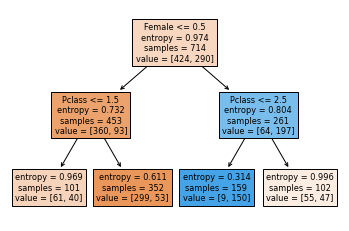

In [3]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]
df.head(7)
df = df.dropna()
df["Female"] = df.Sex == 'female'

feature_names = ["Pclass", "Female", "Age"]
X = df[feature_names]
Y = df.Survived

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_impurity_decrease=0)
clf.fit(X, Y)
print(f'Tree 1-- The accuracy score is: {clf.score(X,Y).round(3)}. And the tree\'s depth is: {clf.tree_.max_depth}.')

clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_impurity_decrease=0)
clf2.fit(X, Y)
print(f'Tree 2-- The accuracy score is: {clf2.score(X,Y).round(3)}.')
_ = tree.plot_tree(clf2, feature_names=feature_names, filled=True)

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

The features used in this tree where weather the passanger was female or not (Female column) and their class (Pclass).

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [4]:
fem = len(df[ (df.Female==1) & (df.Survived==1) ])/df.Female.sum()
male = len(df[ (df.Female==0) & (df.Survived==1) ])/(714-df.Female.sum())
print(f'Female survival proportion: {fem.round(3)}. Male survival proportion: {male.round(3)}.')

Female survival proportion: 0.755. Male survival proportion: 0.205.


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

In [5]:
p1 = (1/4)*2
entr = -p1*np.log2(p1)-(1-p1)*np.log2(1-p1)
entr

1.0

Then entropy of the set S is 1.0. The equation I used: −fID3(S)log2(fID3(S))-(1-fID3(S))log2(1-fID3(S)). fID3 is the proportion of 1 values in S.

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

(x1 & x2 are features to chose from to minimize weighted average entropy)

by x1
2, 6 :0
3, 8 :1
4, 9 :1
5, 7 :0

by x2
2, 6 :0
5, 7 :0
3, 8 :1
4, 9 :1

want to split by x2 because we want a pure node

best split at: (x2, 7.5)